In [1]:
import sys
sys.path.append('../')

In [6]:
import prepnet

import pandas as pd
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8D8454348>,
      dtype=object)

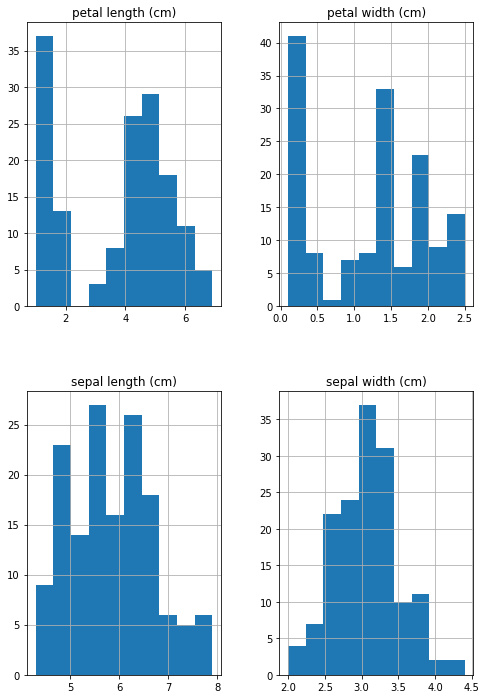

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
display(df.head())
df.hist(figsize=(8, 12))

# Preprocess using prepnet

In [12]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B8D7ED5388>,
      dtype=object)

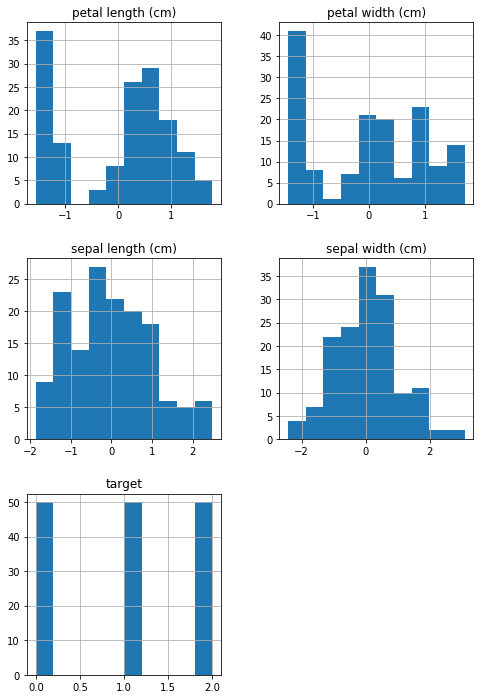

In [4]:
preprocess = {}
for col in df.columns:
    if df.dtypes[col].kind == 'f':
        proc = prepnet.Standardize()
    else:
        proc = prepnet.OrdinalConverter()
    df.loc[:, col] = proc.encode(df[col])
    preprocess[col] = proc
display(df.head())
df.hist(figsize=(8, 12))

In [8]:
model = SVC()
classifier = OneVsRestClassifier(model)
classifier.fit(df.drop(columns=['target']), df['target'])
classifier.predict

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)